In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import warnings
import scipy.stats as stats


In [32]:
#Load data
gh_multipleiv_data=[]
gh_multipleiv_data = pd.read_csv('GroupedDataONS/GH_DT_TM_NSsecEastLindseyandBracknellForestcustom-filtered-2023-11-28T16_53_05Z.csv')

In [33]:
# Rename columns
gh_multipleiv_data_fin=[]
gh_multipleiv_data_fin = gh_multipleiv_data

new_column_names=list()
new_column_names=[
'la_code'
,'la_name'
,'gh_cat'
,'gh_desc'
,'trvlmode_cat'
,'trvlmode_desc'
,'nssec_cat'
,'nssec_desc'
,'hrs_wrkd_cat'
,'hres_wrkd_desc'
,'people_cnt'
]
column_mapping = dict(zip(gh_multipleiv_data.columns, new_column_names))
gh_multipleiv_data_fin.rename(columns=column_mapping, inplace=True)

In [34]:
gh_multipleiv_data_fin

,la_code,la_name,gh_cat,gh_desc,trvlmode_cat,trvlmode_desc,nssec_cat,nssec_desc,hrs_wrkd_cat,hres_wrkd_desc,people_cnt
0,E06000036,Bracknell Forest,-8,Does not apply,1,Work mainly at or from home,-8,Does not apply,-8,Does not apply,0
1,E06000036,Bracknell Forest,-8,Does not apply,1,Work mainly at or from home,-8,Does not apply,1,Part-time: 30 hours or less worked,0
2,E06000036,Bracknell Forest,-8,Does not apply,1,Work mainly at or from home,-8,Does not apply,2,Full-time: 31 or more hours worked,0
3,E06000036,Bracknell Forest,-8,Does not apply,1,Work mainly at or from home,1,"L1, L2 and L3: Higher managerial, administrati...",-8,Does not apply,0
4,E06000036,Bracknell Forest,-8,Does not apply,1,Work mainly at or from home,1,"L1, L2 and L3: Higher managerial, administrati...",1,Part-time: 30 hours or less worked,0
...,...,...,...,...,...,...,...,...,...,...,...
2155,E07000137,East Lindsey,2,Not good health,12,Not in employment or aged 15 years and under,8,L14.1 and L14.2: Never worked and long-term un...,1,Part-time: 30 hours or less worked,0
2156,E07000137,East Lindsey,2,Not good health,12,Not in employment or aged 15 years and under,8,L14.1 and L14.2: Never worked and long-term un...,2,Full-time: 31 or more hours worked,0
2157,E07000137,East Lindsey,2,Not good health,12,Not in employment or aged 15 years and under,9,L15: Full-time students,-8,Does not apply,351
2158,E07000137,East Lindsey,2,Not good health,12,Not in employment or aged 15 years and under,9,L15: Full-time students,1,Part-time: 30 hours or less worked,0


In [35]:
#Check how many records are there with does not apply value
filtered_df = gh_multipleiv_data_fin[gh_multipleiv_data_fin['gh_desc'] == 'Does not apply']
filtered_df1 = filtered_df[filtered_df['people_cnt'] != 0]
print(filtered_df1)

Empty DataFrame
Columns: [la_code, la_name, gh_cat, gh_desc, trvlmode_cat, trvlmode_desc, nssec_cat, nssec_desc, hrs_wrkd_cat, hres_wrkd_desc, people_cnt]
Index: []


In [36]:
#Check how many records are there with does not apply value
filtered_df3 = gh_multipleiv_data_fin[gh_multipleiv_data_fin['trvlmode_desc'] == 'Not in employment or aged 15 years and under']
filtered_df13 = filtered_df[filtered_df['people_cnt'] != 0]
print(filtered_df13)

Empty DataFrame
Columns: [la_code, la_name, gh_cat, gh_desc, trvlmode_cat, trvlmode_desc, nssec_cat, nssec_desc, hrs_wrkd_cat, hres_wrkd_desc, people_cnt]
Index: []


In [37]:

# Remove the records with general health does not apply as there are no values for these in people count
gh_multipleiv_data_fin = gh_multipleiv_data_fin[gh_multipleiv_data_fin['gh_desc'] != 'Does not apply']

In [38]:
# Extract the records with socio economic status as never worked
gh_1 = gh_multipleiv_data_fin[gh_multipleiv_data_fin['nssec_desc'] == 'L14.1 and L14.2: Never worked and long-term unemployed']
#gh_multipleiv_data_fin['trvlmode_desc']=='Not in employment or aged 15 years and under'
gh_1

,la_code,la_name,gh_cat,gh_desc,trvlmode_cat,trvlmode_desc,nssec_cat,nssec_desc,hrs_wrkd_cat,hres_wrkd_desc,people_cnt
384,E06000036,Bracknell Forest,1,Good health,1,Work mainly at or from home,8,L14.1 and L14.2: Never worked and long-term un...,-8,Does not apply,0
385,E06000036,Bracknell Forest,1,Good health,1,Work mainly at or from home,8,L14.1 and L14.2: Never worked and long-term un...,1,Part-time: 30 hours or less worked,0
386,E06000036,Bracknell Forest,1,Good health,1,Work mainly at or from home,8,L14.1 and L14.2: Never worked and long-term un...,2,Full-time: 31 or more hours worked,0
414,E06000036,Bracknell Forest,1,Good health,2,"Underground, metro, light rail, tram",8,L14.1 and L14.2: Never worked and long-term un...,-8,Does not apply,0
415,E06000036,Bracknell Forest,1,Good health,2,"Underground, metro, light rail, tram",8,L14.1 and L14.2: Never worked and long-term un...,1,Part-time: 30 hours or less worked,0
...,...,...,...,...,...,...,...,...,...,...,...
2125,E07000137,East Lindsey,2,Not good health,11,Other method of travel to work,8,L14.1 and L14.2: Never worked and long-term un...,1,Part-time: 30 hours or less worked,0
2126,E07000137,East Lindsey,2,Not good health,11,Other method of travel to work,8,L14.1 and L14.2: Never worked and long-term un...,2,Full-time: 31 or more hours worked,0
2154,E07000137,East Lindsey,2,Not good health,12,Not in employment or aged 15 years and under,8,L14.1 and L14.2: Never worked and long-term un...,-8,Does not apply,6138
2155,E07000137,East Lindsey,2,Not good health,12,Not in employment or aged 15 years and under,8,L14.1 and L14.2: Never worked and long-term un...,1,Part-time: 30 hours or less worked,0


In [39]:
#Remove the records with travelmode description Not in employment
gh_multipleiv_data_fin = gh_multipleiv_data_fin[gh_multipleiv_data_fin['trvlmode_desc']!='Not in employment or aged 15 years and under']#

In [40]:
#Add the records with socio economic status as never worked
#The records with travelmode desc Not in employment and other socio status is removed.
gh_multipleiv_data_fin = gh_multipleiv_data_fin.append(gh_1, ignore_index=True)

In [41]:
gh_multipleiv_data_fin

,la_code,la_name,gh_cat,gh_desc,trvlmode_cat,trvlmode_desc,nssec_cat,nssec_desc,hrs_wrkd_cat,hres_wrkd_desc,people_cnt
0,E06000036,Bracknell Forest,1,Good health,1,Work mainly at or from home,-8,Does not apply,-8,Does not apply,0
1,E06000036,Bracknell Forest,1,Good health,1,Work mainly at or from home,-8,Does not apply,1,Part-time: 30 hours or less worked,0
2,E06000036,Bracknell Forest,1,Good health,1,Work mainly at or from home,-8,Does not apply,2,Full-time: 31 or more hours worked,0
3,E06000036,Bracknell Forest,1,Good health,1,Work mainly at or from home,1,"L1, L2 and L3: Higher managerial, administrati...",-8,Does not apply,0
4,E06000036,Bracknell Forest,1,Good health,1,Work mainly at or from home,1,"L1, L2 and L3: Higher managerial, administrati...",1,Part-time: 30 hours or less worked,885
...,...,...,...,...,...,...,...,...,...,...,...
1459,E07000137,East Lindsey,2,Not good health,11,Other method of travel to work,8,L14.1 and L14.2: Never worked and long-term un...,1,Part-time: 30 hours or less worked,0
1460,E07000137,East Lindsey,2,Not good health,11,Other method of travel to work,8,L14.1 and L14.2: Never worked and long-term un...,2,Full-time: 31 or more hours worked,0
1461,E07000137,East Lindsey,2,Not good health,12,Not in employment or aged 15 years and under,8,L14.1 and L14.2: Never worked and long-term un...,-8,Does not apply,6138
1462,E07000137,East Lindsey,2,Not good health,12,Not in employment or aged 15 years and under,8,L14.1 and L14.2: Never worked and long-term un...,1,Part-time: 30 hours or less worked,0


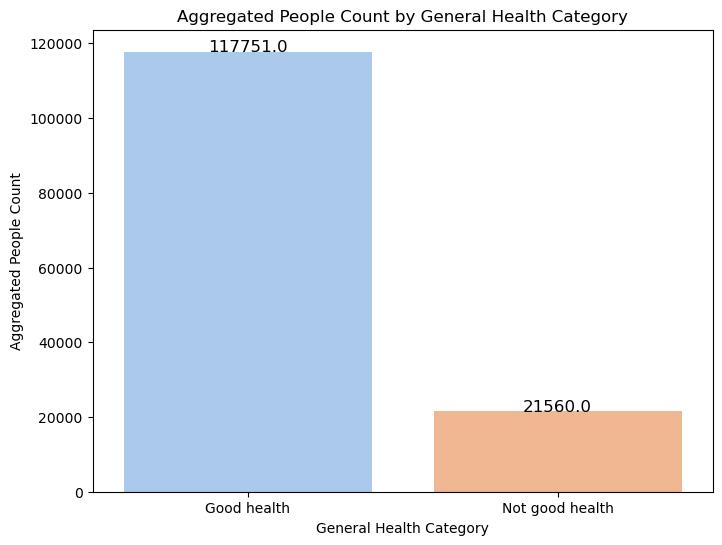

In [42]:
# Aggregate people_cnt by gh_cat
gh_agg = gh_multipleiv_data_fin.groupby('gh_desc')['people_cnt'].sum().reset_index()
#gh_agg

# Set the figure size
plt.figure(figsize=(8, 6))

# Use barplot to plot the aggregated values
ax = sns.barplot(data=gh_agg, x='gh_desc', y='people_cnt', palette='pastel')

# Annotate the count on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12)

# Add title and labels
plt.title('Aggregated People Count by General Health Category')
plt.xlabel('General Health Category')
plt.ylabel('Aggregated People Count')

# Show the plot
plt.show()

In [43]:
gh_agg11 = gh_multipleiv_data_fin.groupby(['trvlmode_desc','nssec_desc'])['people_cnt'].sum().reset_index()
#ab=gh_agg11[gh_agg11['trvlmode_desc']=='Not in employment or aged 15 years and under']
ab=gh_agg11[gh_agg11['nssec_desc']=='L14.1 and L14.2: Never worked and long-term unemployed']
ab

,trvlmode_desc,nssec_desc,people_cnt
5,Bicycle,L14.1 and L14.2: Never worked and long-term un...,0
15,"Bus, minibus or coach",L14.1 and L14.2: Never worked and long-term un...,0
25,Driving a car or van,L14.1 and L14.2: Never worked and long-term un...,0
35,"Motorcycle, scooter or moped",L14.1 and L14.2: Never worked and long-term un...,0
40,Not in employment or aged 15 years and under,L14.1 and L14.2: Never worked and long-term un...,17319
46,On foot,L14.1 and L14.2: Never worked and long-term un...,0
56,Other method of travel to work,L14.1 and L14.2: Never worked and long-term un...,0
66,Passenger in a car or van,L14.1 and L14.2: Never worked and long-term un...,0
76,Taxi,L14.1 and L14.2: Never worked and long-term un...,0
86,Train,L14.1 and L14.2: Never worked and long-term un...,0


In [44]:
gh_agg1 = gh_multipleiv_data_fin.groupby(['gh_desc','hres_wrkd_desc'])['people_cnt'].sum().reset_index()
gh_agg1

,gh_desc,hres_wrkd_desc,people_cnt
0,Good health,Does not apply,9233
1,Good health,Full-time: 31 or more hours worked,77984
2,Good health,Part-time: 30 hours or less worked,30534
3,Not good health,Does not apply,8086
4,Not good health,Full-time: 31 or more hours worked,8114
5,Not good health,Part-time: 30 hours or less worked,5360


In [45]:
gh_agg2 = gh_multipleiv_data_fin.groupby(['gh_desc','trvlmode_desc'])['people_cnt'].sum().reset_index()
gh_agg2

,gh_desc,trvlmode_desc,people_cnt
0,Good health,Bicycle,1878
1,Good health,"Bus, minibus or coach",1100
2,Good health,Driving a car or van,56309
3,Good health,"Motorcycle, scooter or moped",454
4,Good health,Not in employment or aged 15 years and under,9233
5,Good health,On foot,8703
6,Good health,Other method of travel to work,977
7,Good health,Passenger in a car or van,3915
8,Good health,Taxi,307
9,Good health,Train,972


<Figure size 1400x1000 with 0 Axes>

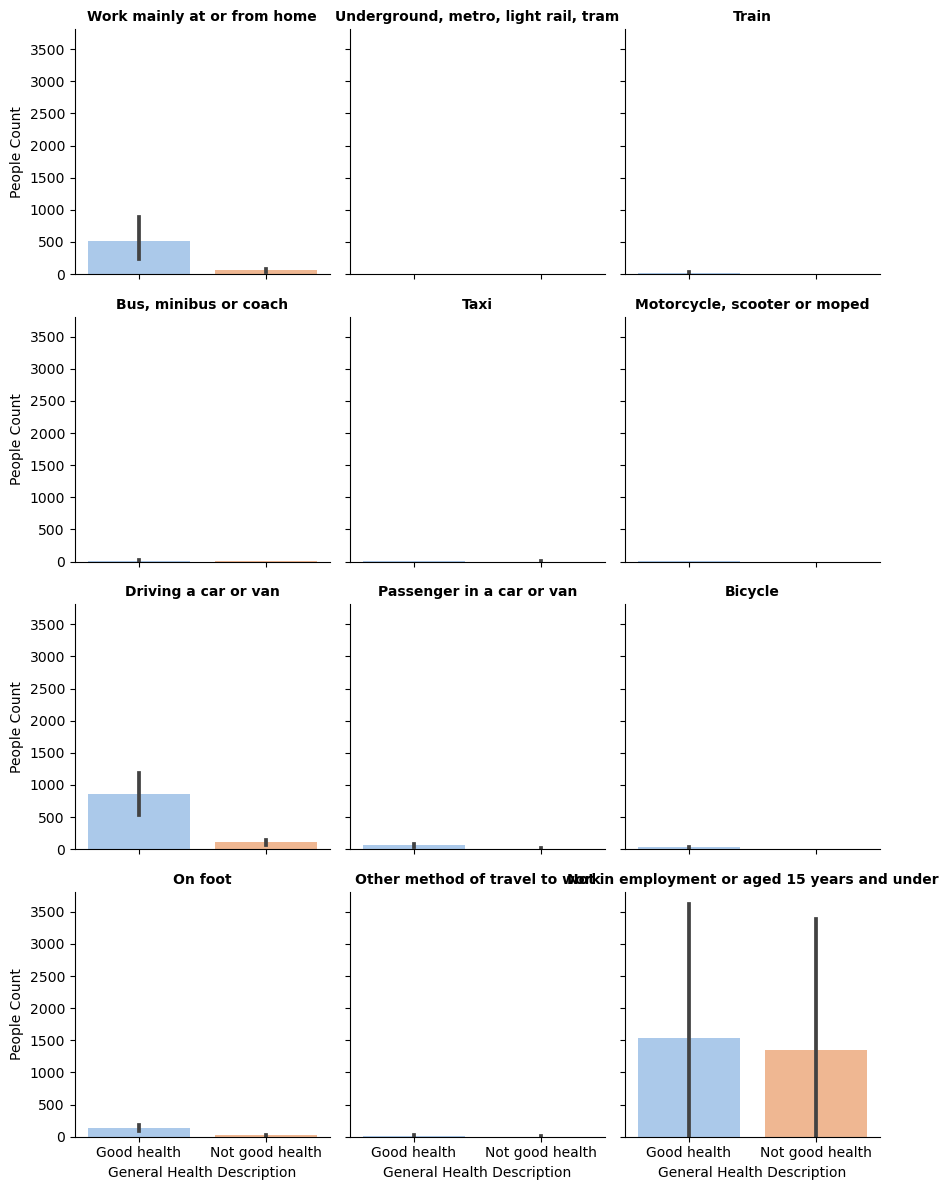

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 10))

# Create a FacetGrid using Seaborn
g = sns.FacetGrid(gh_multipleiv_data_fin, col="trvlmode_desc", col_wrap=3, height=3, margin_titles=True)

# Map the barplot onto the FacetGrid
g.map(sns.barplot, 'gh_desc', 'people_cnt', palette='pastel')

# Add title and labels
g.set_axis_labels('General Health Description', 'People Count')
g.set_titles(col_template="{col_name}", fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [47]:
#Select relevant columns for processing
selected_columns = ['gh_desc',  'trvlmode_desc', 'nssec_desc','hres_wrkd_desc',]
df_selected = gh_multipleiv_data_fin[selected_columns]
df_selected

,gh_desc,trvlmode_desc,nssec_desc,hres_wrkd_desc
0,Good health,Work mainly at or from home,Does not apply,Does not apply
1,Good health,Work mainly at or from home,Does not apply,Part-time: 30 hours or less worked
2,Good health,Work mainly at or from home,Does not apply,Full-time: 31 or more hours worked
3,Good health,Work mainly at or from home,"L1, L2 and L3: Higher managerial, administrati...",Does not apply
4,Good health,Work mainly at or from home,"L1, L2 and L3: Higher managerial, administrati...",Part-time: 30 hours or less worked
...,...,...,...,...
1459,Not good health,Other method of travel to work,L14.1 and L14.2: Never worked and long-term un...,Part-time: 30 hours or less worked
1460,Not good health,Other method of travel to work,L14.1 and L14.2: Never worked and long-term un...,Full-time: 31 or more hours worked
1461,Not good health,Not in employment or aged 15 years and under,L14.1 and L14.2: Never worked and long-term un...,Does not apply
1462,Not good health,Not in employment or aged 15 years and under,L14.1 and L14.2: Never worked and long-term un...,Part-time: 30 hours or less worked


In [48]:
# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df_selected, columns=['gh_desc', 'hres_wrkd_desc', 'trvlmode_desc', 'nssec_desc'])

df_dummies

,gh_desc_Good health,gh_desc_Not good health,hres_wrkd_desc_Does not apply,hres_wrkd_desc_Full-time: 31 or more hours worked,hres_wrkd_desc_Part-time: 30 hours or less worked,trvlmode_desc_Bicycle,"trvlmode_desc_Bus, minibus or coach",trvlmode_desc_Driving a car or van,"trvlmode_desc_Motorcycle, scooter or moped",trvlmode_desc_Not in employment or aged 15 years and under,...,nssec_desc_Does not apply,"nssec_desc_L1, L2 and L3: Higher managerial, administrative and professional occupations",nssec_desc_L10 and L11: Lower supervisory and technical occupations,nssec_desc_L12: Semi-routine occupations,nssec_desc_L13: Routine occupations,nssec_desc_L14.1 and L14.2: Never worked and long-term unemployed,nssec_desc_L15: Full-time students,"nssec_desc_L4, L5 and L6: Lower managerial, administrative and professional occupations",nssec_desc_L7: Intermediate occupations,nssec_desc_L8 and L9: Small employers and own account workers
0,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1460,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1461,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1462,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [49]:
# Concatenate the dummy variables with the original DataFrame
df_processed=[]
df_processed = pd.concat([gh_multipleiv_data_fin, df_dummies], axis=1)

# Drop the original categorical columns and 'people_cnt' since it will be replaced
df_processed = df_processed.drop(['gh_cat', 'hrs_wrkd_cat', 'trvlmode_cat', 'nssec_cat','gh_desc', 'hres_wrkd_desc', 'trvlmode_desc', 'nssec_desc' ], axis=1)


In [50]:
df_processed

,la_code,la_name,people_cnt,gh_desc_Good health,gh_desc_Not good health,hres_wrkd_desc_Does not apply,hres_wrkd_desc_Full-time: 31 or more hours worked,hres_wrkd_desc_Part-time: 30 hours or less worked,trvlmode_desc_Bicycle,"trvlmode_desc_Bus, minibus or coach",...,nssec_desc_Does not apply,"nssec_desc_L1, L2 and L3: Higher managerial, administrative and professional occupations",nssec_desc_L10 and L11: Lower supervisory and technical occupations,nssec_desc_L12: Semi-routine occupations,nssec_desc_L13: Routine occupations,nssec_desc_L14.1 and L14.2: Never worked and long-term unemployed,nssec_desc_L15: Full-time students,"nssec_desc_L4, L5 and L6: Lower managerial, administrative and professional occupations",nssec_desc_L7: Intermediate occupations,nssec_desc_L8 and L9: Small employers and own account workers
0,E06000036,Bracknell Forest,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,E06000036,Bracknell Forest,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,E06000036,Bracknell Forest,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,E06000036,Bracknell Forest,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,E06000036,Bracknell Forest,885,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,E07000137,East Lindsey,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1460,E07000137,East Lindsey,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1461,E07000137,East Lindsey,6138,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1462,E07000137,East Lindsey,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [51]:
#Repeating each row according to peoplecount
rows_list = []

# Iterate through each row in the DataFrame
for index, row in df_processed.iterrows():
    # Repeat the row according to the 'people_cnt' value
    for _ in range(row['people_cnt']):
        rows_list.append(row)

# Create a new DataFrame with the repeated rows
new_df = pd.DataFrame(rows_list)

# Reset the index of the new DataFrame
new_df.reset_index(drop=True, inplace=True)


In [20]:
new_df

,la_code,la_name,people_cnt,gh_desc_Good health,gh_desc_Not good health,hres_wrkd_desc_Bicycle,"hres_wrkd_desc_Bus, minibus or coach",hres_wrkd_desc_Driving a car or van,"hres_wrkd_desc_Motorcycle, scooter or moped",hres_wrkd_desc_Not in employment or aged 15 years and under,...,trvlmode_desc_L12: Semi-routine occupations,trvlmode_desc_L13: Routine occupations,trvlmode_desc_L14.1 and L14.2: Never worked and long-term unemployed,trvlmode_desc_L15: Full-time students,"trvlmode_desc_L4, L5 and L6: Lower managerial, administrative and professional occupations",trvlmode_desc_L7: Intermediate occupations,trvlmode_desc_L8 and L9: Small employers and own account workers,nssec_desc_Does not apply,nssec_desc_Full-time: 31 or more hours worked,nssec_desc_Part-time: 30 hours or less worked
0,E06000036,Bracknell Forest,885,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,E06000036,Bracknell Forest,885,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,E06000036,Bracknell Forest,885,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,E06000036,Bracknell Forest,885,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,E06000036,Bracknell Forest,885,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266912,E07000137,East Lindsey,351,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
266913,E07000137,East Lindsey,351,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
266914,E07000137,East Lindsey,351,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
266915,E07000137,East Lindsey,351,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [52]:
# Calculate the strength of relationship between feature and class variable.
warnings.filterwarnings("ignore")
cd=['la_code','la_name','people_cnt','gh_desc_Not good health','nssec_desc_Does not apply']
data = new_df.drop(cd, axis=1)
results_df = pd.DataFrame(columns=['Feature', 'Chi-Squared', 'p-value'])
# Iterate through each categorical feature
for feature in data.columns:
    if feature != 'gh_desc_Good health':  # Exclude the class variable itself
        crosstab = pd.crosstab(data[feature], data['gh_desc_Good health'])
        chi2, p_value, dof, expected = stats.chi2_contingency(crosstab)
        print(f"{feature} chi-squared: {chi2:.3f} (p-value: {p_value:.3f})")
        results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)


hres_wrkd_desc_Does not apply chi-squared: 14726.838 (p-value: 0.000)
hres_wrkd_desc_Full-time: 31 or more hours worked chi-squared: 6310.090 (p-value: 0.000)
hres_wrkd_desc_Part-time: 30 hours or less worked chi-squared: 10.855 (p-value: 0.001)
trvlmode_desc_Bicycle chi-squared: 33.750 (p-value: 0.000)
trvlmode_desc_Bus, minibus or coach chi-squared: 7.238 (p-value: 0.007)
trvlmode_desc_Driving a car or van chi-squared: 1754.084 (p-value: 0.000)
trvlmode_desc_Motorcycle, scooter or moped chi-squared: 1.644 (p-value: 0.200)
trvlmode_desc_Not in employment or aged 15 years and under chi-squared: 14726.838 (p-value: 0.000)
trvlmode_desc_On foot chi-squared: 57.702 (p-value: 0.000)
trvlmode_desc_Other method of travel to work chi-squared: 7.557 (p-value: 0.006)
trvlmode_desc_Passenger in a car or van chi-squared: 28.811 (p-value: 0.000)
trvlmode_desc_Taxi chi-squared: 25.113 (p-value: 0.000)
trvlmode_desc_Train chi-squared: 39.567 (p-value: 0.000)
trvlmode_desc_Underground, metro, light r

In [53]:
results_df.sort_values(by='Chi-Squared',ascending=False)

,Feature,Chi-Squared,p-value
0,hres_wrkd_desc_Does not apply,14726.838053,0.000000e+00
19,nssec_desc_L14.1 and L14.2: Never worked and l...,14726.838053,0.000000e+00
7,trvlmode_desc_Not in employment or aged 15 yea...,14726.838053,0.000000e+00
1,hres_wrkd_desc_Full-time: 31 or more hours worked,6310.090428,0.000000e+00
5,trvlmode_desc_Driving a car or van,1754.083749,0.000000e+00
21,"nssec_desc_L4, L5 and L6: Lower managerial, ad...",1318.167636,1.273974e-288
14,trvlmode_desc_Work mainly at or from home,1245.928834,6.365564e-273
15,"nssec_desc_L1, L2 and L3: Higher managerial, a...",1064.826819,1.457766e-233
22,nssec_desc_L7: Intermediate occupations,428.419371,3.588503e-95
20,nssec_desc_L15: Full-time students,199.243328,3.054613e-45


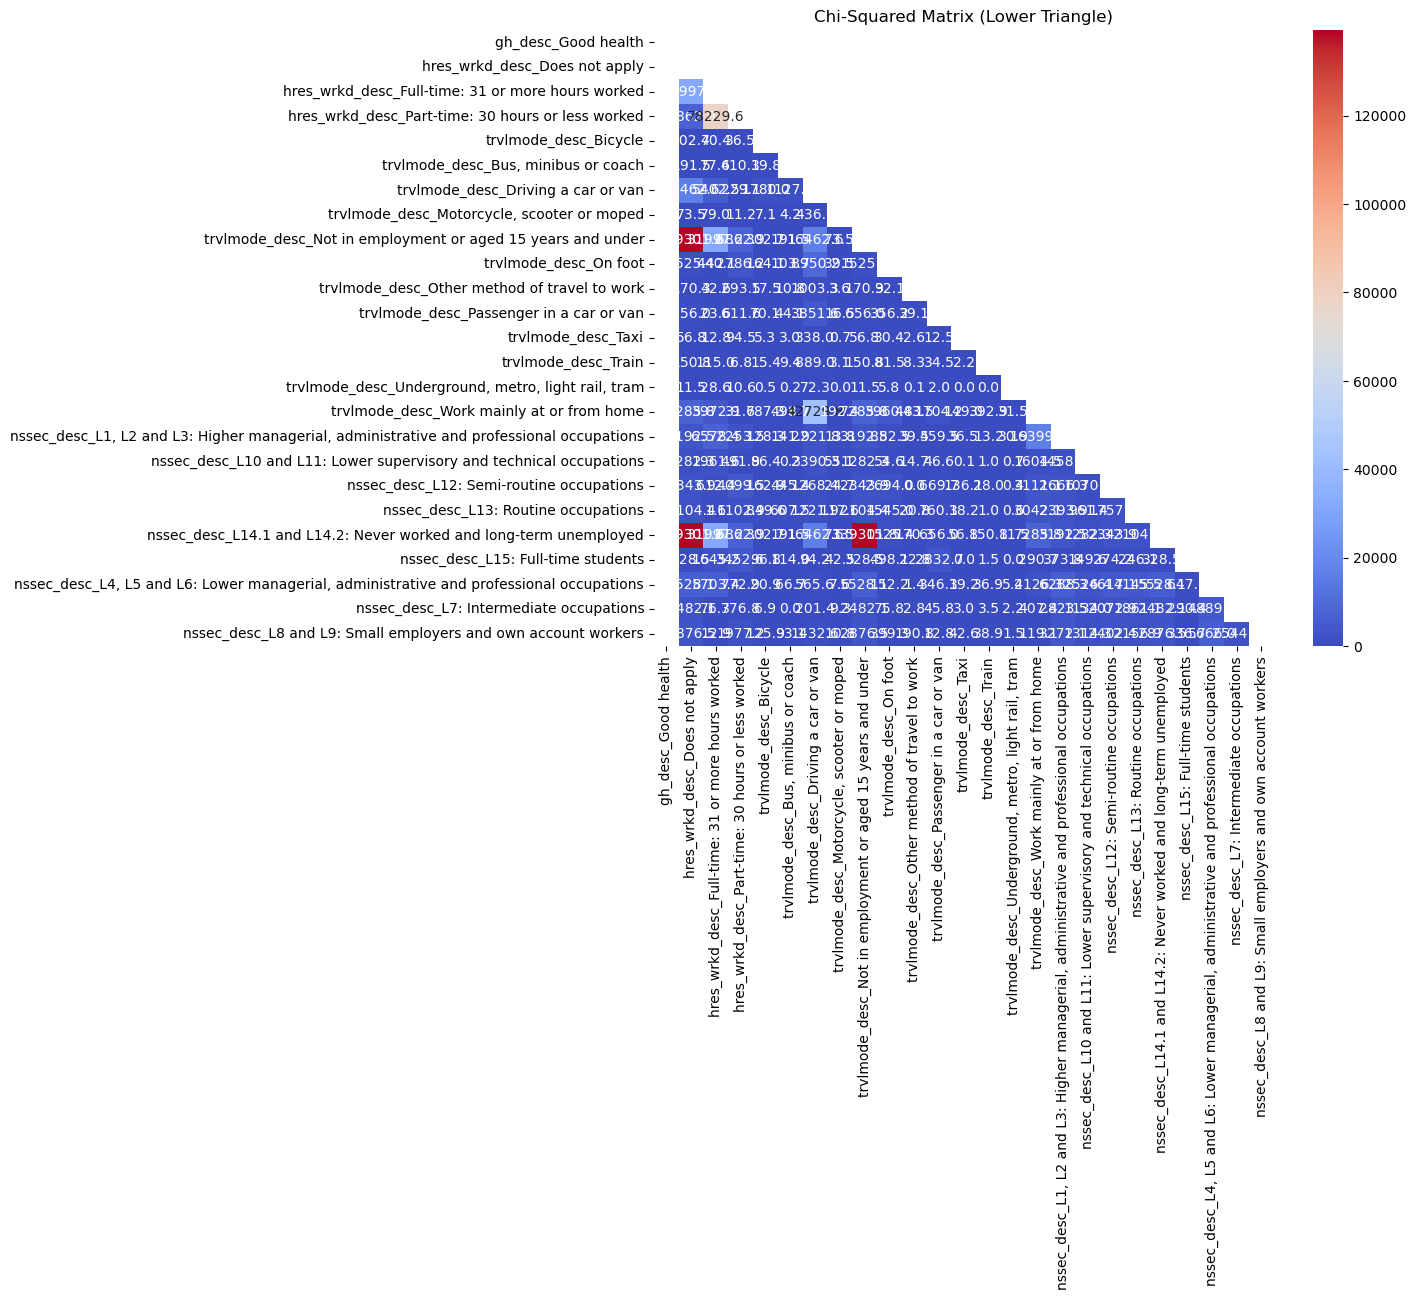

In [54]:
# Create an empty DataFrame to store the chi-squared values
chi2_matrix = pd.DataFrame(index=data.columns, columns=data.columns)

# Iterate through pairs of different categorical features
for feature1 in data.columns:
    if feature1 != 'gh_desc_Good health':
        for feature2 in data.columns:
            if feature2 != 'gh_desc_Good health' and feature2 != feature1:
                crosstab = pd.crosstab(data[feature1], data[feature2])
                chi2, _, _, _ = stats.chi2_contingency(crosstab)
                chi2_matrix.loc[feature1, feature2] = round(chi2,1)

# Create a mask for the upper triangle
mask = np.triu(np.ones(chi2_matrix.shape), k=1)

# Plot a heatmap of the chi-squared values (lower triangle)
plt.figure(figsize=(10, 8))
sns.heatmap(chi2_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".1f", mask=mask)
plt.title("Chi-Squared Matrix (Lower Triangle)")
plt.show()

In [55]:
import statsmodels.api as sm
xaic=data.drop('gh_desc_Good health', axis=1)
yaic=data['gh_desc_Good health']

# Stepwise variable selection using AIC
def stepwise_selection(xaic, yaic, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(xaic.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(yaic, sm.add_constant(pd.DataFrame(xaic[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval}')
        
        # Backward step
        model = sm.OLS(yaic, sm.add_constant(pd.DataFrame(xaic[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval}')
        
        if not changed:
            break
    
    return included

result = stepwise_selection(xaic, yaic)

# Print the selected features
print("Selected features:", result)


Add  hres_wrkd_desc_Full-time: 31 or more hours worked with p-value 0.0
Add  nssec_desc_L14.1 and L14.2: Never worked and long-term unemployed with p-value 0.0
Add  hres_wrkd_desc_Does not apply with p-value 0.0
Add  trvlmode_desc_Not in employment or aged 15 years and under with p-value 0.0
Add  nssec_desc_L13: Routine occupations with p-value 2.1978970009821887e-42
Add  nssec_desc_L12: Semi-routine occupations with p-value 3.447684561273094e-36
Add  nssec_desc_L8 and L9: Small employers and own account workers with p-value 5.178131361703373e-48
Add  nssec_desc_L15: Full-time students with p-value 1.0994318191565105e-21
Add  nssec_desc_L10 and L11: Lower supervisory and technical occupations with p-value 5.631053569816086e-17
Add  trvlmode_desc_Taxi with p-value 2.3765435393957007e-11
Add  trvlmode_desc_Other method of travel to work with p-value 9.69370687943136e-10
Add  trvlmode_desc_Bus, minibus or coach with p-value 2.8429682519734336e-08
Add  nssec_desc_L1, L2 and L3: Higher mana

In [56]:
# Split the data into training (80%) and testing (20%) sets

#X_train_full, X_test, y_train_full, y_test = train_test_split(
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('gh_desc_Good health', axis=1), data['gh_desc_Good health'], test_size=0.2, random_state=42)

In [57]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[    0  4318]
 [    0 23545]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4318
           1       0.85      1.00      0.92     23545

    accuracy                           0.85     27863
   macro avg       0.42      0.50      0.46     27863
weighted avg       0.71      0.85      0.77     27863



In [58]:
# Access the coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_

feature_coefficients = list(zip(X_train.columns, coefficients))
for feature, coefficient in feature_coefficients:
    print(f"{feature}: {coefficient}")

hres_wrkd_desc_Does not apply: -0.4419982069185578
hres_wrkd_desc_Full-time: 31 or more hours worked: 0.6157873504527095
hres_wrkd_desc_Part-time: 30 hours or less worked: 0.17147666860270494
trvlmode_desc_Bicycle: 0.27361123240931284
trvlmode_desc_Bus, minibus or coach: -0.21651001149247912
trvlmode_desc_Driving a car or van: 0.18938085966615034
trvlmode_desc_Motorcycle, scooter or moped: -0.09375171383053782
trvlmode_desc_Not in employment or aged 15 years and under: -0.4419982069185578
trvlmode_desc_On foot: 0.12613402977502394
trvlmode_desc_Other method of travel to work: -0.33095374294597235
trvlmode_desc_Passenger in a car or van: 0.13584640960137917
trvlmode_desc_Taxi: -0.6557028325732579
trvlmode_desc_Train: 0.39816633867853374
trvlmode_desc_Underground, metro, light rail, tram: 0.8285887543115477
trvlmode_desc_Work mainly at or from home: 0.13245469545507146
nssec_desc_L1, L2 and L3: Higher managerial, administrative and professional occupations: 0.34658350880252015
nssec_desc

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    data[result], data['gh_desc_Good health'], test_size=0.2, random_state=42)

In [60]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    0  4318]
 [    0 23545]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4318
           1       0.85      1.00      0.92     23545

    accuracy                           0.85     27863
   macro avg       0.42      0.50      0.46     27863
weighted avg       0.71      0.85      0.77     27863



In [ ]:
# Access the coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-2.12072604  0.09483108 -0.61083312 -0.76271528  1.05972318  0.5168526
 -0.40948001  0.63903737  0.49728448 -0.63142898  0.26755649  0.15843639
 -0.23400286 -0.5037779  -0.13798964 -0.24859895 -0.08293034]
Intercept: [2.42917043]


In [ ]:
#Perform undersampling to avoid imbalance
from imblearn.under_sampling import RandomUnderSampler

# Use RandomUnderSampler to perform undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [ ]:
#Perform oversampling
from imblearn.over_sampling import RandomOverSampler
# Use RandomOverSampler to perform oversampling
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [61]:
#Oversampling using SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [62]:
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 2326  1992]
 [ 5218 18327]]
              precision    recall  f1-score   support

           0       0.31      0.54      0.39      4318
           1       0.90      0.78      0.84     23545

    accuracy                           0.74     27863
   macro avg       0.61      0.66      0.61     27863
weighted avg       0.81      0.74      0.77     27863



In [ ]:
from matplotlib import pyplot
# Identify best features based on chi square
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 3623.165107


Feature 1: 27533.596629
Feature 2: 2063.343666
Feature 3: 17.229594
Feature 4: 0.272799
Feature 5: 321.163316
Feature 6: 24.064313
Feature 7: 118.430109
Feature 8: 29.574664
Feature 9: 152.432945
Feature 10: 508.173710
Feature 11: 143.891341
Feature 12: 6.483220
Feature 13: 4596.537974
Feature 14: 1766.609786
Feature 15: 4.000831
Feature 16: 129.663809


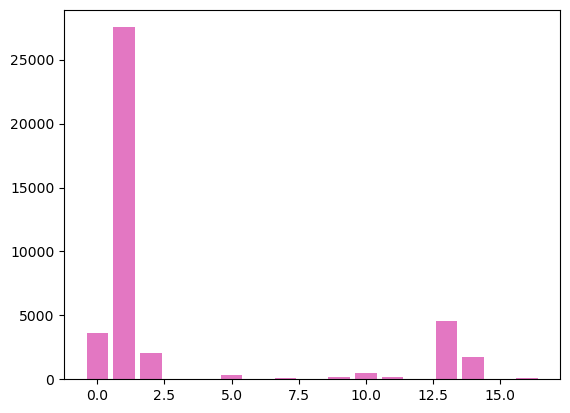

In [ ]:
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
 pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 0: 0.052642
Feature 1: 0.008269
Feature 2: 0.001487
Feature 3: 0.001326
Feature 4: 0.001750
Feature 5: 0.000350
Feature 6: 0.001758
Feature 7: 0.000000
Feature 8: 0.001509
Feature 9: 0.000168
Feature 10: 0.000069
Feature 11: 0.000507
Feature 12: 0.000674
Feature 13: 0.002042
Feature 14: 0.048508
Feature 15: 0.024658
Feature 16: 0.000000
Feature 17: 0.000391
Feature 18: 0.000438
Feature 19: 0.052661
Feature 20: 0.000000
Feature 21: 0.014691
Feature 22: 0.001343
Feature 23: 0.001728


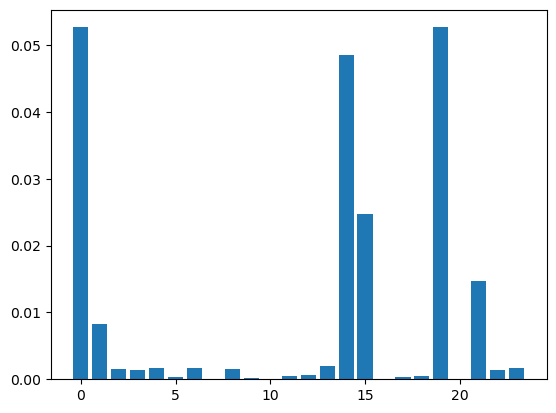

In [ ]:

# feature selection based on mutual information gain
def select_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=mutual_info_classif, k='all')
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


In [63]:
# Tried individual training and test performance without cross validation

#model = KNeighborsClassifier(n_neighbors = 12)
model = RandomForestClassifier(bootstrap=True, max_features='sqrt', n_estimators=50, max_depth=None,min_samples_split=5, random_state=42)
#model = DecisionTreeClassifier(random_state=42)
#model = BernoulliNB()
#model = GaussianNB()
#model = LogisticRegression(max_iter=1000)
# Train the model on the training data
model.fit(X_train, y_train)
# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4318
           1       0.85      1.00      0.92     23545

    accuracy                           0.85     27863
   macro avg       0.42      0.50      0.46     27863
weighted avg       0.71      0.85      0.77     27863



In [64]:
# Model Validation on unseen data - Based on report and miss rate Random Forest is chosena s best model.
# Fit random forest on entire training data and test it using unseen test data(20% of dataset).

#X_best_features_train = X_train
X_best_features_test = X_test
X_best_features_train = X_resampled
y_train = y_resampled
best_model= RandomForestClassifier(bootstrap=True, max_features='sqrt', n_estimators=50, max_depth=None,min_samples_split=5, random_state=7)

# Fit the best_model on entire training data
best_model.fit(X_best_features_train, y_train)

# Make predictions on unseen data using the best model
y_pred_val = best_model.predict(X_test)

# Evaluate the best model's performance
accuracy = accuracy_score(y_test, y_pred_val)
precision = precision_score(y_test, y_pred_val)
recall = recall_score(y_test, y_pred_val)
f1 = f1_score(y_test, y_pred_val)
conf_matrix = confusion_matrix(y_test, y_pred_val)
miss_rate = 1-recall

print("Test")
print("Best Model Performance:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Miss Rate: {miss_rate:.3f}")
print(conf_matrix)

Test
Best Model Performance:
Accuracy: 0.743
Precision: 0.902
Recall: 0.782
F1 Score: 0.837
Miss Rate: 0.218
[[ 2308  2010]
 [ 5137 18408]]


hres_wrkd_desc_Does not apply: 0.2438
nssec_desc_L14.1 and L14.2: Never worked and long-term unemployed: 0.2342
trvlmode_desc_Not in employment or aged 15 years and under: 0.2177
hres_wrkd_desc_Full-time: 31 or more hours worked: 0.1840
nssec_desc_L13: Routine occupations: 0.0258
nssec_desc_L1, L2 and L3: Higher managerial, administrative and professional occupations: 0.0243
nssec_desc_L12: Semi-routine occupations: 0.0181
nssec_desc_L15: Full-time students: 0.0179
nssec_desc_L8 and L9: Small employers and own account workers: 0.0159
nssec_desc_L10 and L11: Lower supervisory and technical occupations: 0.0056
trvlmode_desc_Taxi: 0.0047
trvlmode_desc_Other method of travel to work: 0.0046
trvlmode_desc_Bus, minibus or coach: 0.0035


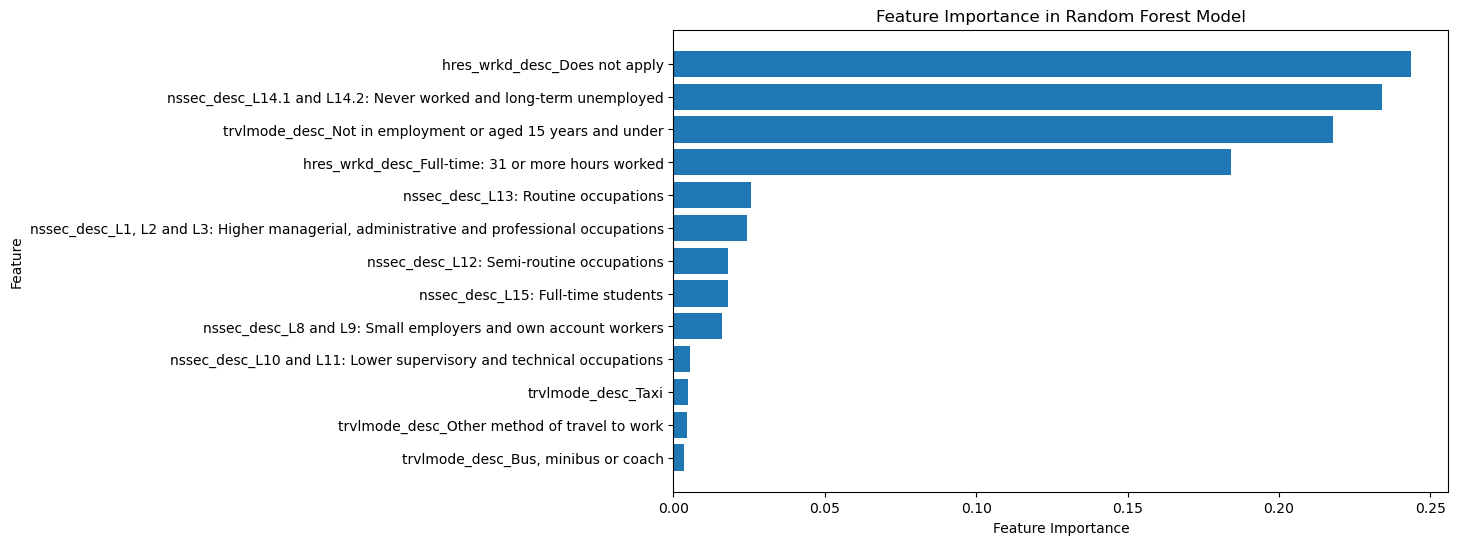

In [65]:
#Model Interpretation using feature importance
# Get feature importances
feature_importances = best_model.feature_importances_

# Create a list of feature names
feature_names = X_best_features_train.columns

# Create a dictionary to map features to their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the features by importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted features and their importance scores
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

# Create lists to hold the sorted features and their importance scores
sorted_feature_names = [feature for feature, _ in sorted_features]
sorted_importances = [importance for _, importance in sorted_features]
sorted_feature_names.reverse()
sorted_importances.reverse()

# Create a horizontal bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()



In [66]:
#Train and test each algorithm on training data using stratified cross validation and cross_val_predict
#Check the report and confusion matrix
#prepare algorithms to test
models = []
models.append(('NB', BernoulliNB()))
#models.append(('kNN', KNeighborsClassifier(n_neighbors = 9)))
models.append(('LogR', LogisticRegression(max_iter=2000)))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(bootstrap=True, max_features='sqrt', n_estimators=50, max_depth=None,min_samples_split=5, random_state=7)))


#X_best_features_train =X_train

#X_best_features_train =X_train
results = []
names = []
for name, model in models:
    stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    # Fit the best_model on your training data
    # model.fit(X_best_features_train, y_train)
    # Perform cross-validation and get predicted labels
    y_pred = cross_val_predict(model, X_best_features_train, y_train, cv=stratified_kfold)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    conf_matrix = confusion_matrix(y_train, y_pred)
    report = classification_report(y_train, y_pred)
    miss_rate = 1-recall
    
    #results.append((f1))
    names.append(name)
    
    # Print the evaluation metrics
    #print("%s: Accuracy=%.3f, F1=%.3f, Recall=%.3f, Precision=%.3f" % (name, accuracy, f1, recall, precision))
    print(name)
    print(report)
    print("Confusion Matrix:\n", conf_matrix)
    print("MissRate",round(miss_rate,3))
    print()

NB
              precision    recall  f1-score   support

           0       0.82      0.38      0.52     94206
           1       0.60      0.92      0.72     94206

    accuracy                           0.65    188412
   macro avg       0.71      0.65      0.62    188412
weighted avg       0.71      0.65      0.62    188412

Confusion Matrix:
 [[35417 58789]
 [ 7586 86620]]
MissRate 0.081

LogR
              precision    recall  f1-score   support

           0       0.71      0.56      0.62     94206
           1       0.63      0.77      0.70     94206

    accuracy                           0.66    188412
   macro avg       0.67      0.66      0.66    188412
weighted avg       0.67      0.66      0.66    188412

Confusion Matrix:
 [[52501 41705]
 [21678 72528]]
MissRate 0.23

DT
              precision    recall  f1-score   support

           0       0.71      0.55      0.62     94206
           1       0.63      0.77      0.70     94206

    accuracy                           0

In [67]:
# Calculate the strength of relationship between feature and class variable.  Chi square test for good health
from sklearn.feature_selection import chi2
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")

columns_to_exclude = ['la_code', 'la_name', 'gh_desc_Not good health']

# Create a new DataFrame by excluding the specified columns
df_selected = df_processed.drop(columns=columns_to_exclude)
sel_col=df_selected.columns
data = df_processed[sel_col]
results_df = pd.DataFrame(columns=['Feature', 'Chi-Squared', 'p-value'])
# Iterate through each categorical feature
for feature in data.columns:
    if feature != 'gh_desc_Good health' and feature != 'people_cnt':  # Exclude the class variable itself
        crosstab = pd.crosstab(data['gh_desc_Good health'] , data[feature], values=data['people_cnt'], aggfunc='sum', margins=True, margins_name='Total')
        #if feature=='nssec_desc':
            #crosstab = crosstab + 1e-10
        chi2, p_value, dof, expected = stats.chi2_contingency(crosstab)
        print(f"{feature} chi-squared: {chi2:.3f} (p-value: {p_value:.3f})")


        # Number of observations
        n = crosstab.sum().sum()

        # Number of categories in the first variable
        k = crosstab.shape[0]

        # Number of categories in the second variable
        r = crosstab.shape[1]

        # Calculate Cramer's V
        cramers_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

        print(f"Cramer's V value: {cramers_v}")
        #print(crosstab)
        results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)


hres_wrkd_desc_Does not apply chi-squared: 14729.563 (p-value: 0.000)
Cramer's V value: 0.11496277257859291
hres_wrkd_desc_Full-time: 31 or more hours worked chi-squared: 6311.302 (p-value: 0.000)
Cramer's V value: 0.07525264492119534
hres_wrkd_desc_Part-time: 30 hours or less worked chi-squared: 10.911 (p-value: 0.028)
Cramer's V value: 0.0031289165650886484
trvlmode_desc_Bicycle chi-squared: 34.103 (p-value: 0.000)
Cramer's V value: 0.005531732987931316
trvlmode_desc_Bus, minibus or coach chi-squared: 7.444 (p-value: 0.114)
Cramer's V value: 0.0025843608204308087
trvlmode_desc_Driving a car or van chi-squared: 1754.707 (p-value: 0.000)
Cramer's V value: 0.03967935419939137
trvlmode_desc_Motorcycle, scooter or moped chi-squared: 1.803 (p-value: 0.772)
Cramer's V value: 0.0012718182902944372
trvlmode_desc_Not in employment or aged 15 years and under chi-squared: 14729.563 (p-value: 0.000)
Cramer's V value: 0.11496277257859291
trvlmode_desc_On foot chi-squared: 57.921 (p-value: 0.000)
C

ValueError: The internally computed table of expected frequencies has a zero element at (0, 1).

In [68]:
# Calculate the strength of relationship between feature and class variable.  Chi square test for Not good health
from sklearn.feature_selection import chi2
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")

columns_to_exclude = ['la_code', 'la_name', 'gh_desc_Good health']

# Create a new DataFrame by excluding the specified columns
df_selected = df_processed.drop(columns=columns_to_exclude)
sel_col=df_selected.columns
data = df_processed[sel_col]
results_df = pd.DataFrame(columns=['Feature', 'Chi-Squared', 'p-value'])
# Iterate through each categorical feature
for feature in data.columns:
    if feature != 'gh_desc_Not good health' and feature != 'people_cnt':  # Exclude the class variable itself
        crosstab = pd.crosstab(data['gh_desc_Not good health'] , data[feature], values=data['people_cnt'], aggfunc='sum', margins=True, margins_name='Total')
        #if feature=='nssec_desc':
            #crosstab = crosstab + 1e-10
        chi2, p_value, dof, expected = stats.chi2_contingency(crosstab)
        print(f"{feature} chi-squared: {chi2:.3f} (p-value: {p_value:.3f})")


        # Number of observations
        n = crosstab.sum().sum()

        # Number of categories in the first variable
        k = crosstab.shape[0]

        # Number of categories in the second variable
        r = crosstab.shape[1]

        # Calculate Cramer's V
        cramers_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

        print(f"Cramer's V value: {cramers_v}")
        #print(crosstab)
        results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)


hres_wrkd_desc_Does not apply chi-squared: 14729.563 (p-value: 0.000)
Cramer's V value: 0.11496277257859291
hres_wrkd_desc_Full-time: 31 or more hours worked chi-squared: 6311.302 (p-value: 0.000)
Cramer's V value: 0.07525264492119534
hres_wrkd_desc_Part-time: 30 hours or less worked chi-squared: 10.911 (p-value: 0.028)
Cramer's V value: 0.003128916565088648
trvlmode_desc_Bicycle chi-squared: 34.103 (p-value: 0.000)
Cramer's V value: 0.005531732987931316
trvlmode_desc_Bus, minibus or coach chi-squared: 7.444 (p-value: 0.114)
Cramer's V value: 0.0025843608204308087
trvlmode_desc_Driving a car or van chi-squared: 1754.707 (p-value: 0.000)
Cramer's V value: 0.03967935419939137
trvlmode_desc_Motorcycle, scooter or moped chi-squared: 1.803 (p-value: 0.772)
Cramer's V value: 0.0012718182902944372
trvlmode_desc_Not in employment or aged 15 years and under chi-squared: 14729.563 (p-value: 0.000)
Cramer's V value: 0.11496277257859291
trvlmode_desc_On foot chi-squared: 57.921 (p-value: 0.000)
Cr

ValueError: The internally computed table of expected frequencies has a zero element at (0, 1).

In [69]:
# Calculate the strength of relationship between feature and class variable.  - on overall data
from sklearn.feature_selection import chi2
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")
sel_col=['gh_desc','hres_wrkd_desc','trvlmode_desc','nssec_desc','people_cnt']
data = gh_multipleiv_data_fin[sel_col]
results_df = pd.DataFrame(columns=['Feature', 'Chi-Squared', 'p-value'])
# Iterate through each categorical feature
for feature in data.columns:
    if feature != 'gh_desc' and feature != 'people_cnt':  # Exclude the class variable itself
        crosstab = pd.crosstab(data['gh_desc'] , data[feature], values=data['people_cnt'], aggfunc='sum', margins=True, margins_name='Total')
        if feature=='nssec_desc':
            crosstab = crosstab + 1e-10
        chi2, p_value, dof, expected = stats.chi2_contingency(crosstab)
        print(f"{feature} chi-squared: {chi2:.3f} (p-value: {p_value:.3f})")


        # Number of observations
        n = crosstab.sum().sum()

        # Number of categories in the first variable
        k = crosstab.shape[0]

        # Number of categories in the second variable
        r = crosstab.shape[1]

        # Calculate Cramer's V
        cramers_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

        print(f"Cramer's V value: {cramers_v}")
        #print(crosstab)
        results_df = results_df.append({'Feature': feature, 'Chi-Squared': chi2, 'p-value': p_value}, ignore_index=True)


hres_wrkd_desc chi-squared: 15317.243 (p-value: 0.000)
Cramer's V value: 0.11723373675247355
trvlmode_desc chi-squared: 14971.326 (p-value: 0.000)
Cramer's V value: 0.11590240002392618
nssec_desc chi-squared: 15556.800 (p-value: 0.000)
Cramer's V value: 0.11814692997261655


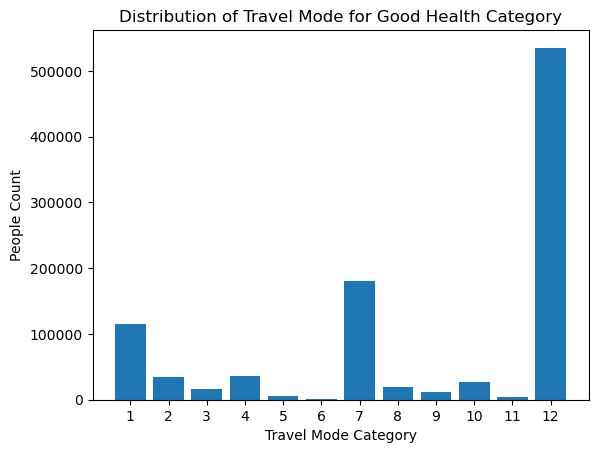

In [ ]:
import matplotlib.pyplot as plt

plt.bar(gh_trvlmode_data_fin['trvlmode_cat'].astype(str), gh_trvlmode_data_fin['people_cnt'])
plt.xlabel('Travel Mode Category')
plt.ylabel('People Count')
plt.title('Distribution of Travel Mode for Good Health Category')
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your DataFrame
# Add an intercept term to the predictor variable
data['intercept'] = 1

# Define predictor and response variables
X = data[['intercept', 'trvlmodes_1', 'trvlmodes_2', 'trvlmodes_3', 'trvlmodes_4', 'trvlmodes_5', 'trvlmodes_6', 'trvlmodes_7', 'trvlmodes_8', 'trvlmodes_9', 'trvlmodes_10', 'trvlmodes_11', 'trvlmodes_12']]
y = data['gh_1']

# Check for multicollinearity
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Standardize numeric variables (optional)
# X[['numeric_var1', 'numeric_var2']] = (X[['numeric_var1', 'numeric_var2']] - X[['numeric_var1', 'numeric_var2']].mean()) / X[['numeric_var1', 'numeric_var2']].std()

# Fit logistic regression model with increased maxiter
#logit_model = sm.Logit(y, X, maxiter=1000)
#result = logit_model.fit()

# Display the summary
#print(result.summary())


c:\Users\91956\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\Users\91956\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


        Variable  VIF
0      intercept  0.0
1    trvlmodes_1  inf
2    trvlmodes_2  inf
3    trvlmodes_3  inf
4    trvlmodes_4  inf
5    trvlmodes_5  inf
6    trvlmodes_6  inf
7    trvlmodes_7  inf
8    trvlmodes_8  inf
9    trvlmodes_9  inf
10  trvlmodes_10  inf
11  trvlmodes_11  inf
12  trvlmodes_12  inf
